In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.optimize import curve_fit


In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Function to read CSV files and parse the polylines
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Function to plot the shapes
def plot(paths_XYs,title='Polyline Plot'):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_title(title)
    ax.set_aspect('equal')
    plt.show()


<class 'list'>
26


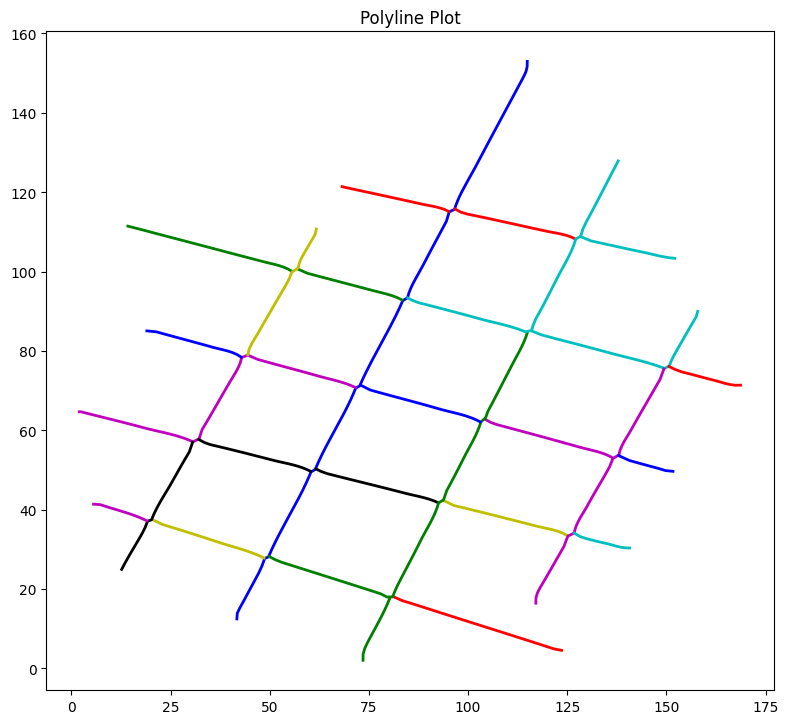

In [75]:
shape = read_csv("resources/frag2.csv")
print(type(shape))
print(len(shape))
shape
plot(shape)

In [69]:
def bezier_curve(t, P0, P1, P2, P3):
    """Compute the coordinates of a point on a cubic Bézier curve at parameter t."""
    t = t.reshape(-1, 1)  # Reshape t to be a column vector for broadcasting
    return (1-t)**3 * P0 + 3*(1-t)**2 * t * P1 + 3*(1-t) * t**2 * P2 + t**3 * P3



def sample_bezier(P0, P1, P2, P3, num_points=100):
    """Sample points on the Bézier curve defined by control points P0, P1, P2, P3."""
    t_values = np.linspace(0, 1, num_points)
    points = np.array([bezier_curve(t, P0, P1, P2, P3) for t in t_values])
    return np.squeeze(points)  # Ensure that the returned array has the correct shape



In [70]:
def check_reflection_symmetry(points, axis='y'):
    if axis == 'y':
        reflected_points = points.copy()
        reflected_points[:, 0] *= -1
    elif axis == 'x':
        reflected_points = points.copy()
        reflected_points[:, 1] *= -1

    distances = np.linalg.norm(points - np.flipud(reflected_points), axis=1)
    symmetry_score = np.mean(distances)
    return np.mean(distances) < 1e-2

In [71]:
def fit_bezier(points):
    def bezier_parametric(t, x0, y0, x1, y1, x2, y2, x3, y3):
        P0 = np.array([x0, y0])
        P1 = np.array([x1, y1])
        P2 = np.array([x2, y2])
        P3 = np.array([x3, y3])
        return bezier_curve(t, P0, P1, P2, P3).ravel()

    t_values = np.linspace(0, 1, len(points))
    popt, _ = curve_fit(bezier_parametric, t_values, points.ravel(), maxfev=10000)
    return popt

In [72]:
def find_vc(points):
    # Fit the Bézier curve
    bezier_params = fit_bezier(points)
    P0, P1, P2, P3 = (np.array([bezier_params[i], bezier_params[i+1]]) for i in range(0, 8, 2))
    
    # Using the method from the document to calculate vC
    # Define the vectors
    v1 = P1 - P0
    v2 = P2 - P3
    
    # Calculate vC based on scalar products
    numerator = np.dot(v1, v2)
    denominator = np.dot(v2, v2)
    
    if denominator != 0:
        vc = -numerator / denominator
    else:
        vc = 0.5  # In case of division by zero, assume the midpoint
    
    return vc

In [73]:
def de_casteljau_subdivision(P0, P1, P2, P3, t):
    """ Perform De Casteljau's algorithm for subdivision at t. """
    Q0 = (1-t)*P0 + t*P1
    Q1 = (1-t)*P1 + t*P2
    Q2 = (1-t)*P2 + t*P3
    R0 = (1-t)*Q0 + t*Q1
    R1 = (1-t)*Q1 + t*Q2
    S = (1-t)*R0 + t*R1
    
    # Returns the two subdivided Bézier curves
    return (P0, Q0, R0, S), (S, R1, Q2, P3)


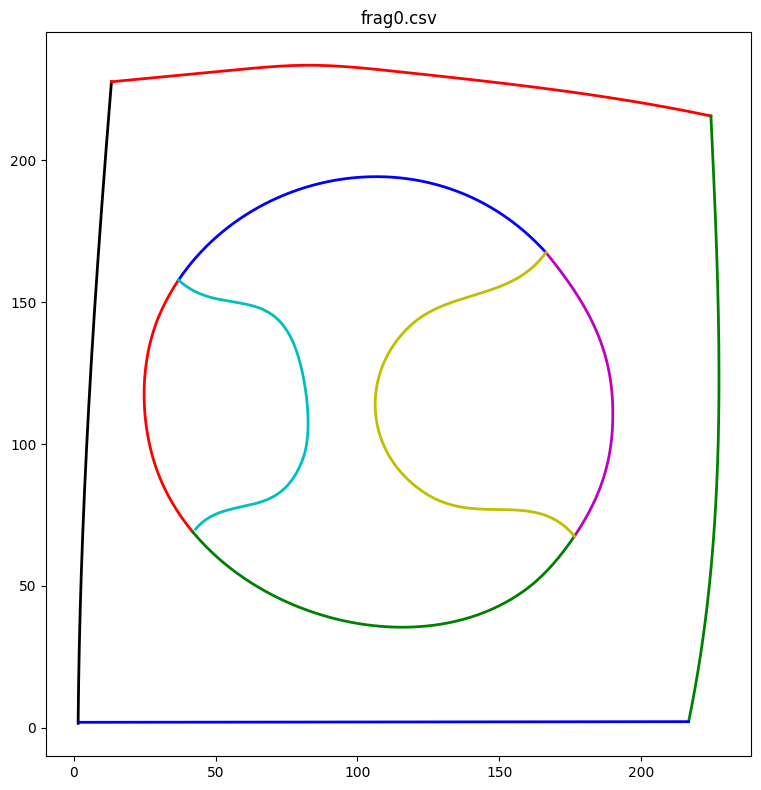

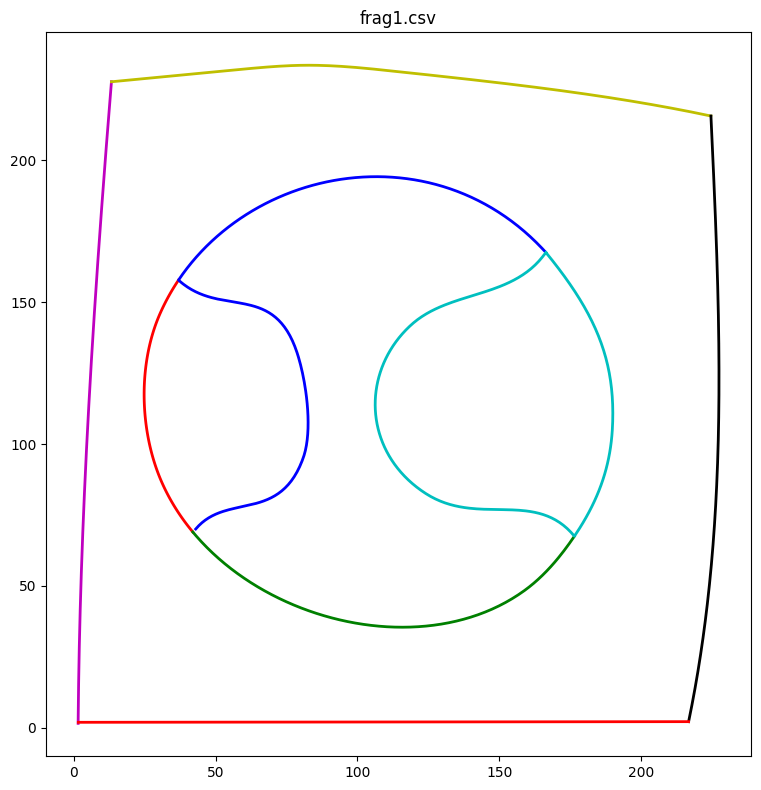

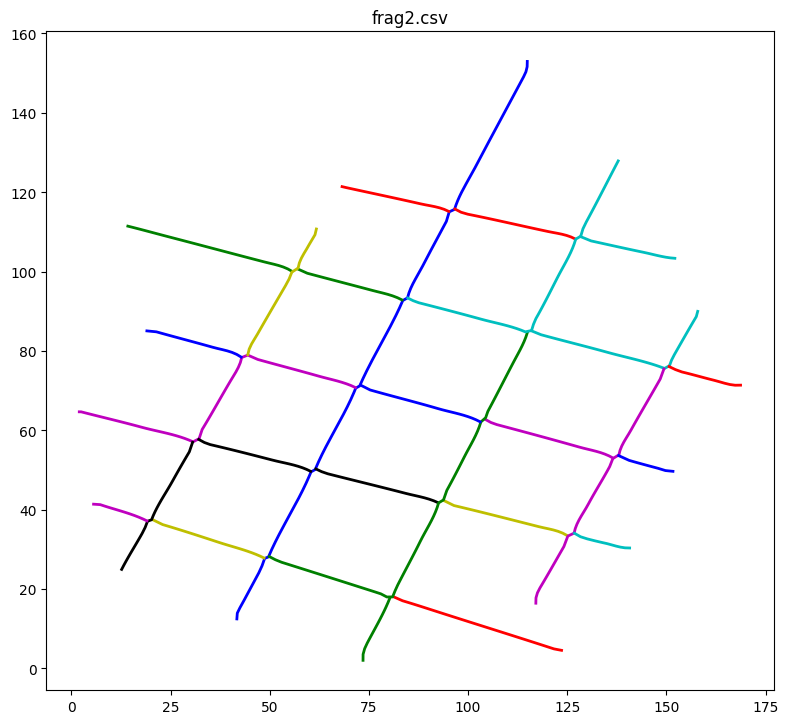

Symmetry along the y-axis for path 0: No


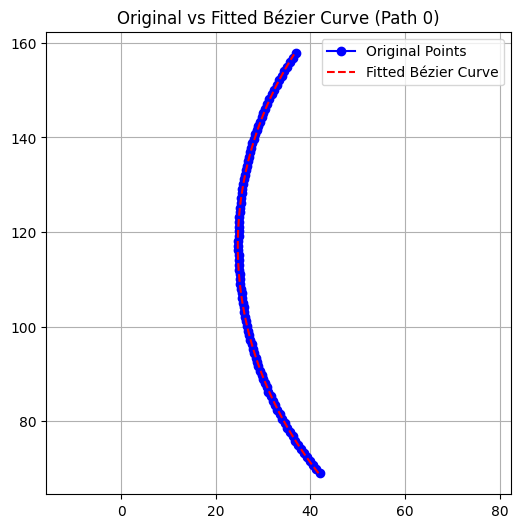

Symmetry along the y-axis for path 1: No


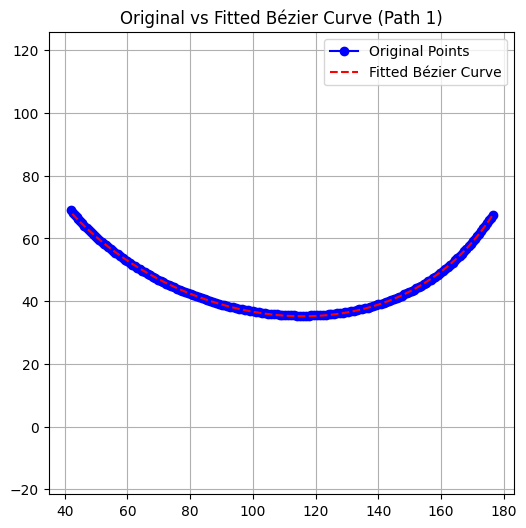

Symmetry along the y-axis for path 2: No


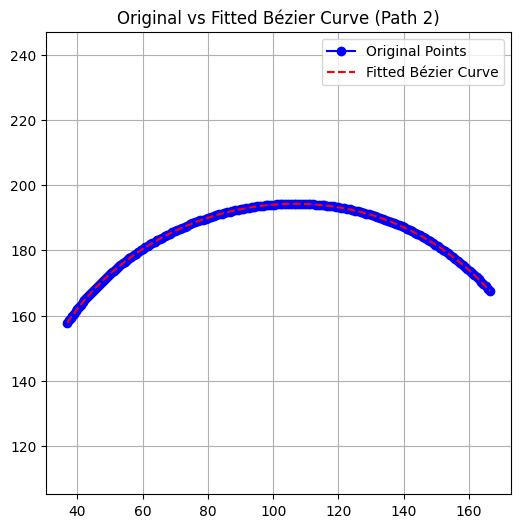

Symmetry along the y-axis for path 3: No


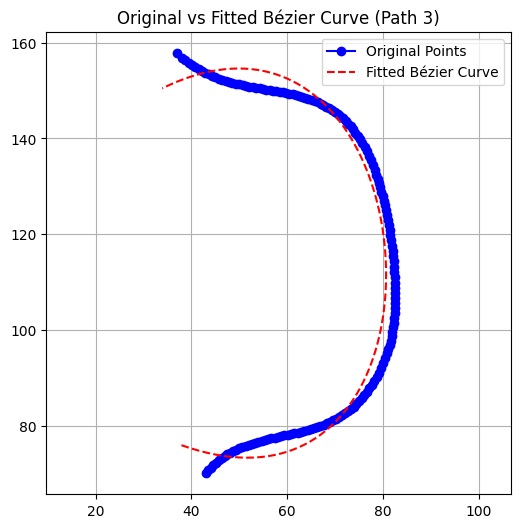

Symmetry along the y-axis for path 4: No


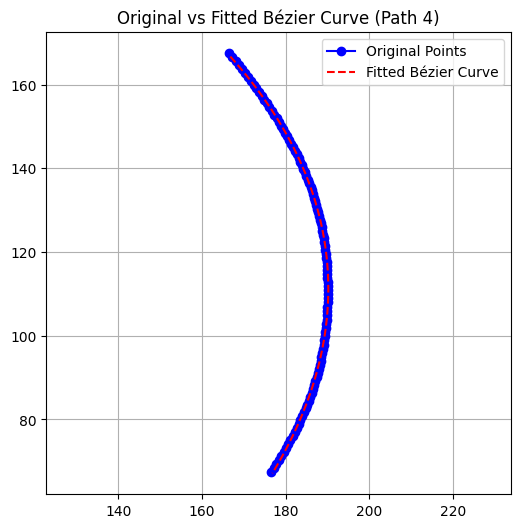

Symmetry along the y-axis for path 5: No


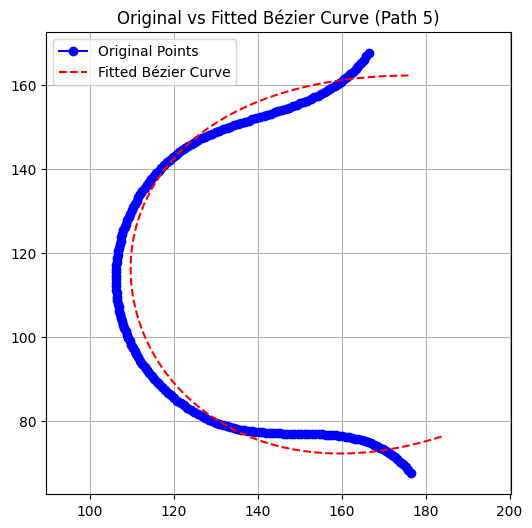

Symmetry along the y-axis for path 6: No


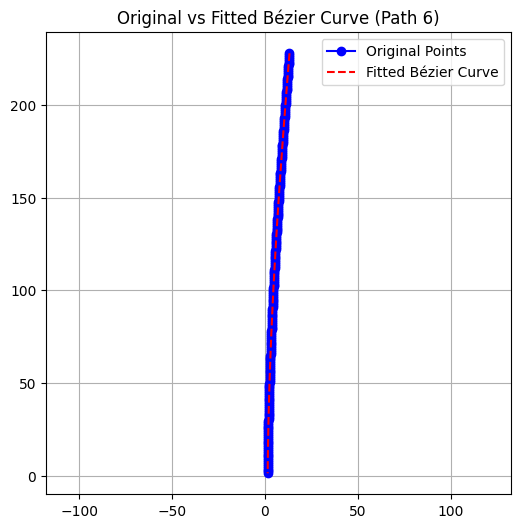

Symmetry along the y-axis for path 7: No


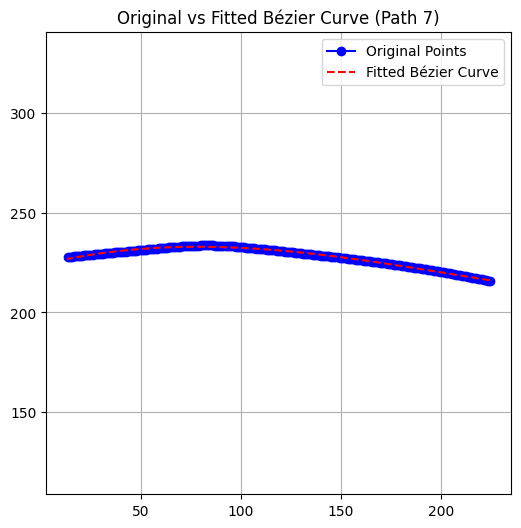

Symmetry along the y-axis for path 8: No


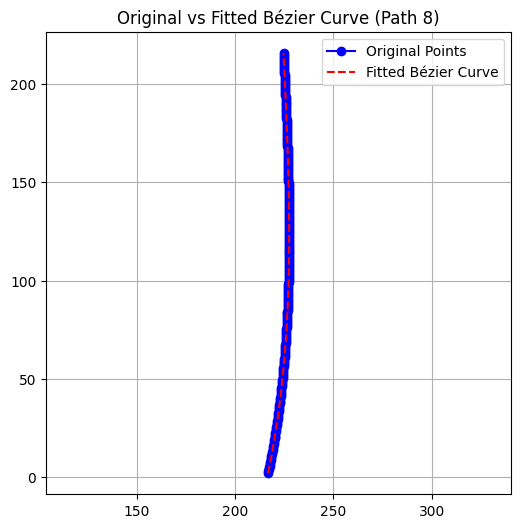

Symmetry along the y-axis for path 9: No


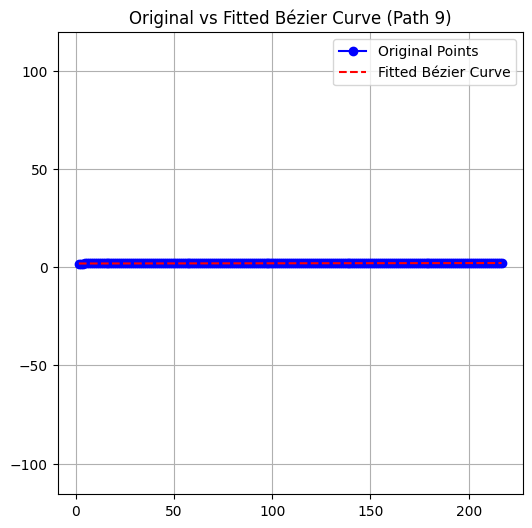

Symmetry along the y-axis for path 0: No


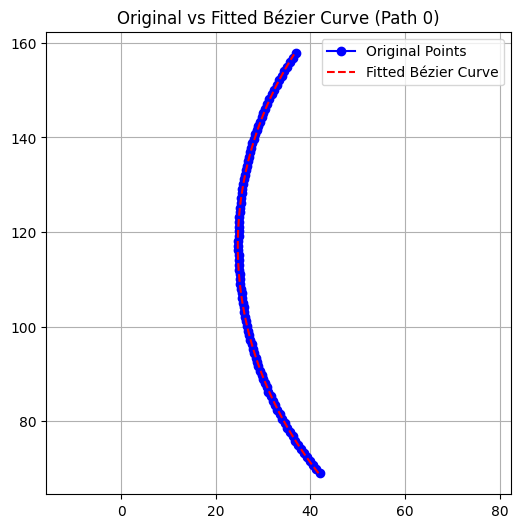

Symmetry along the y-axis for path 1: No


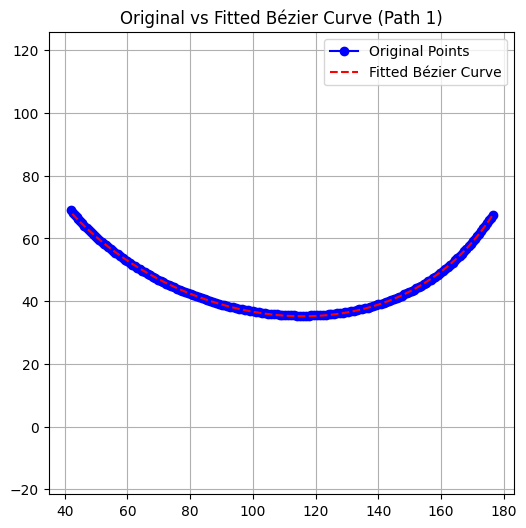

Symmetry along the y-axis for path 2: No


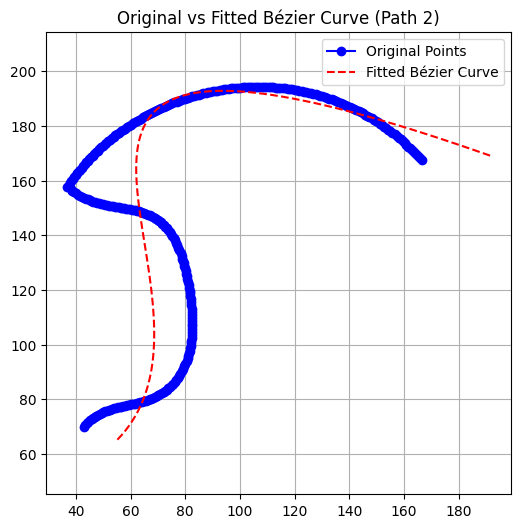

Symmetry along the y-axis for path 3: No


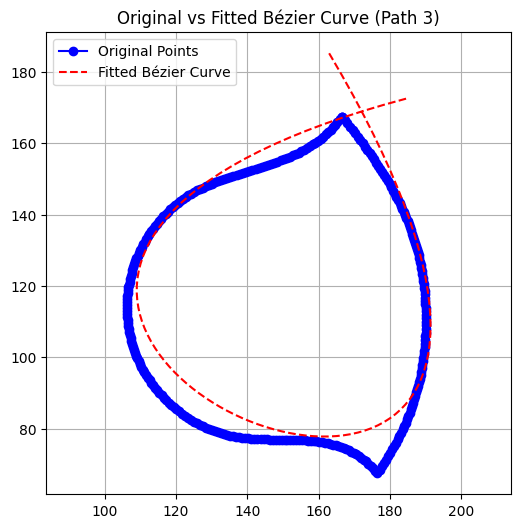

Symmetry along the y-axis for path 4: No


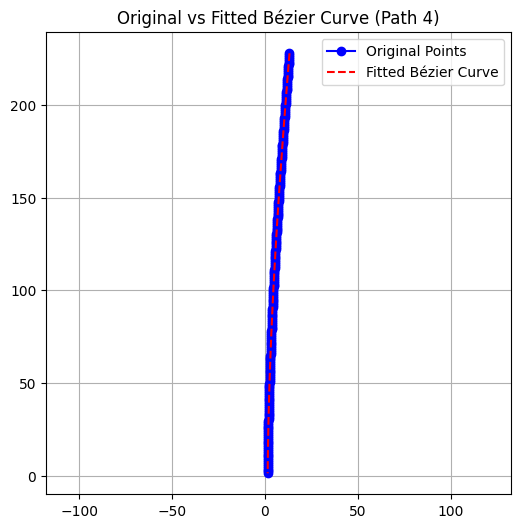

Symmetry along the y-axis for path 5: No


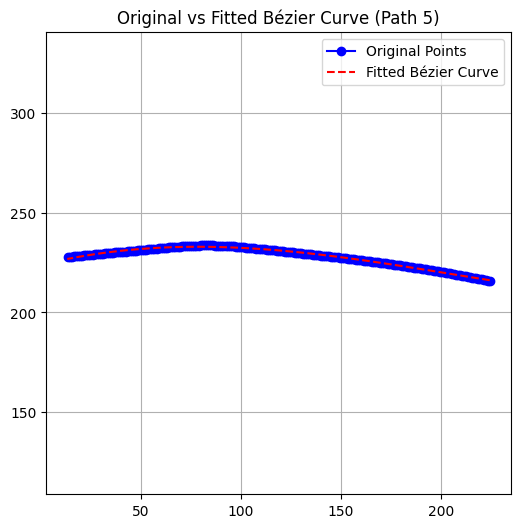

Symmetry along the y-axis for path 6: No


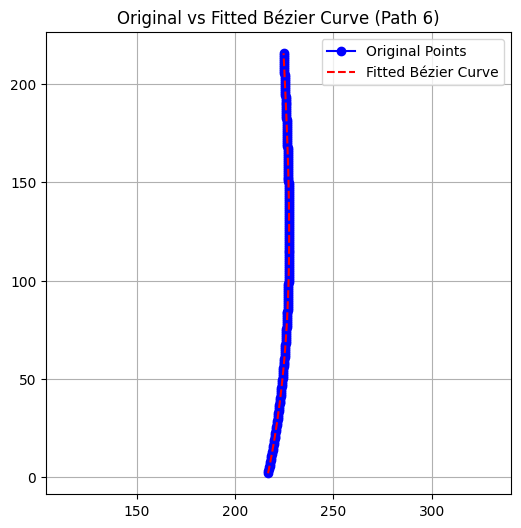

Symmetry along the y-axis for path 7: No


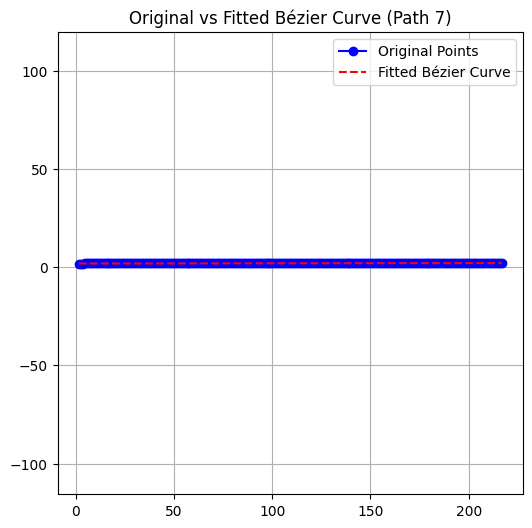

Symmetry along the y-axis for path 0: No


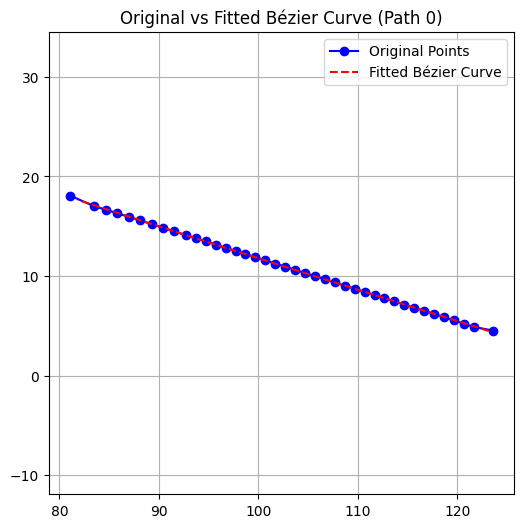

Symmetry along the y-axis for path 1: No


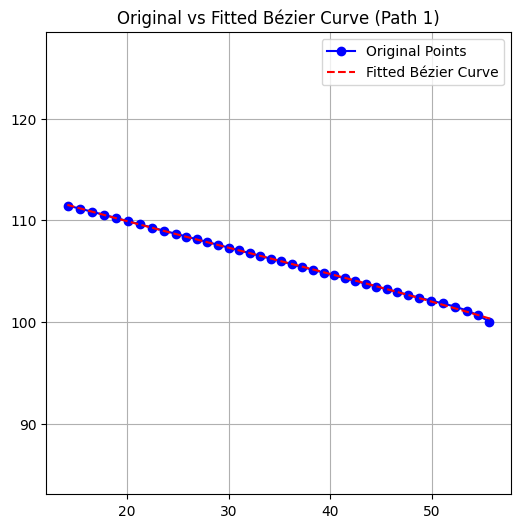

Symmetry along the y-axis for path 2: No


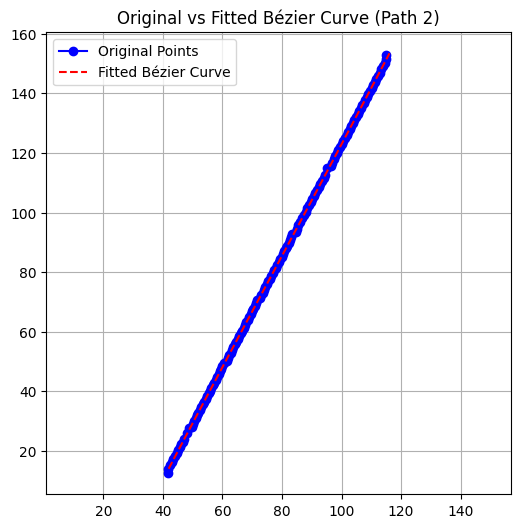

Symmetry along the y-axis for path 3: No


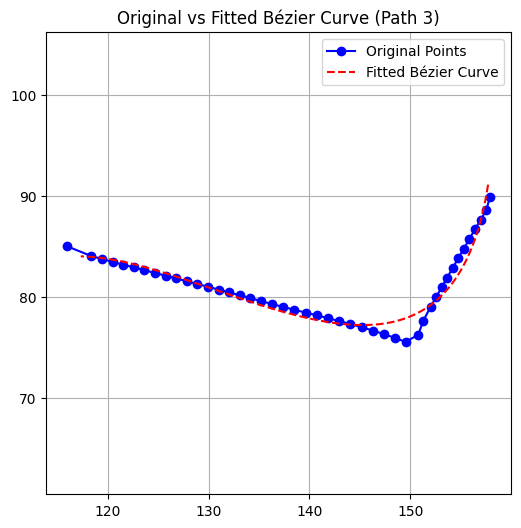

Symmetry along the y-axis for path 4: No


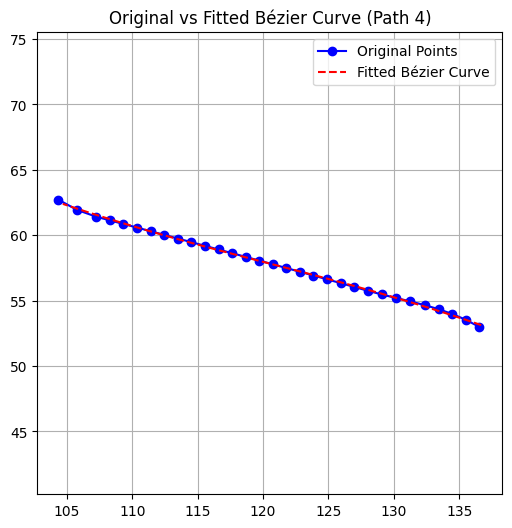

Symmetry along the y-axis for path 5: No


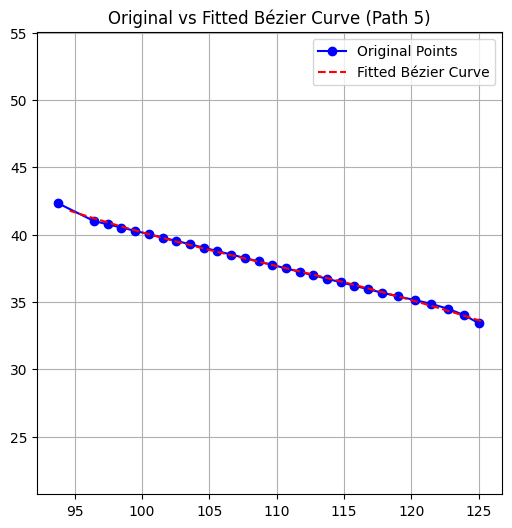

Symmetry along the y-axis for path 6: No


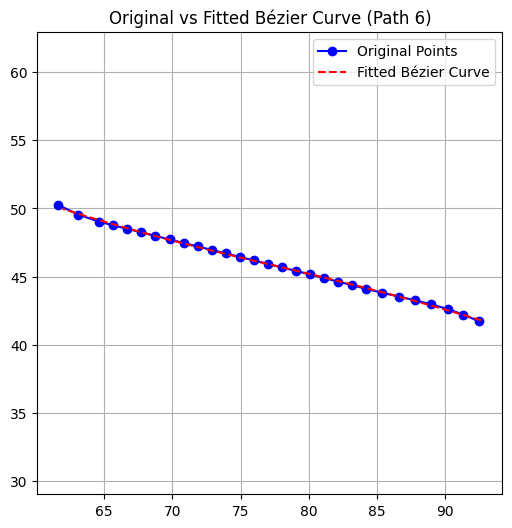

Symmetry along the y-axis for path 7: No


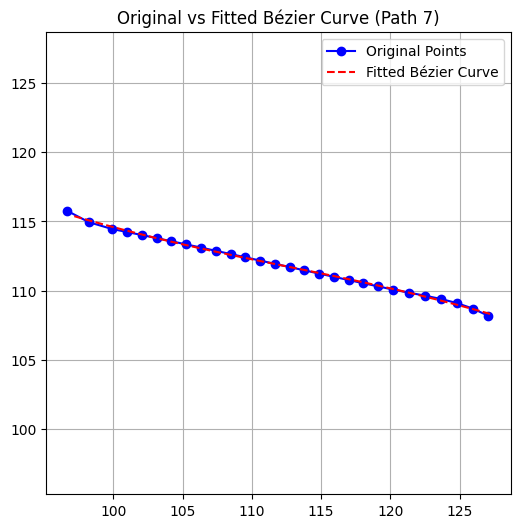

Symmetry along the y-axis for path 8: No


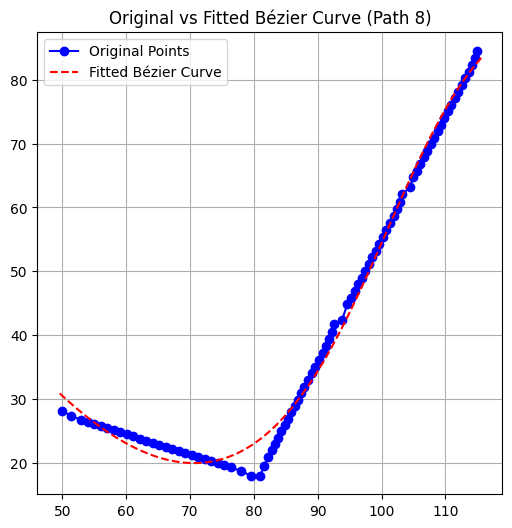

Symmetry along the y-axis for path 9: No


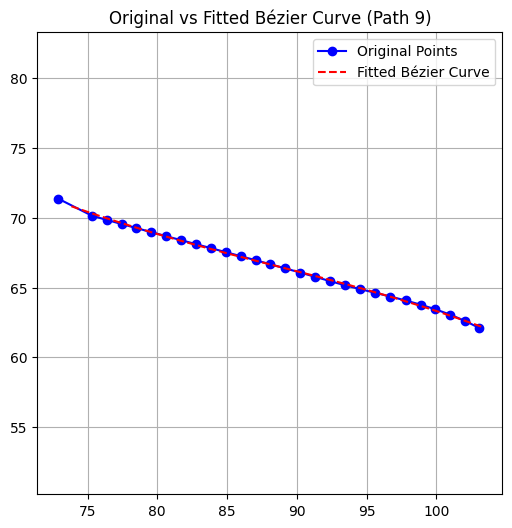

Symmetry along the y-axis for path 10: No


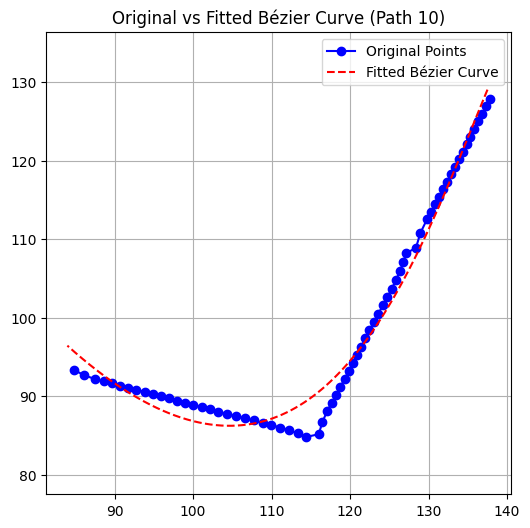

Symmetry along the y-axis for path 11: No


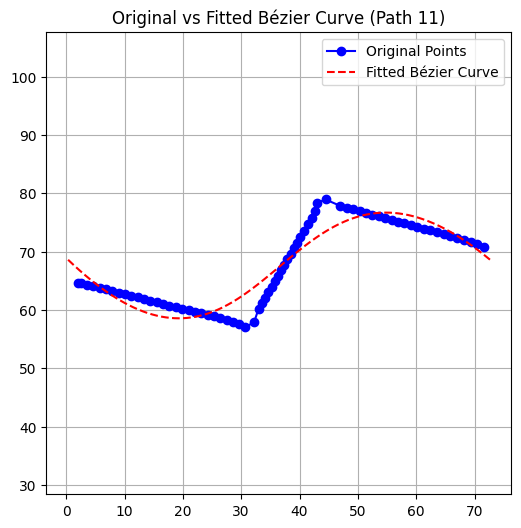

Symmetry along the y-axis for path 12: No


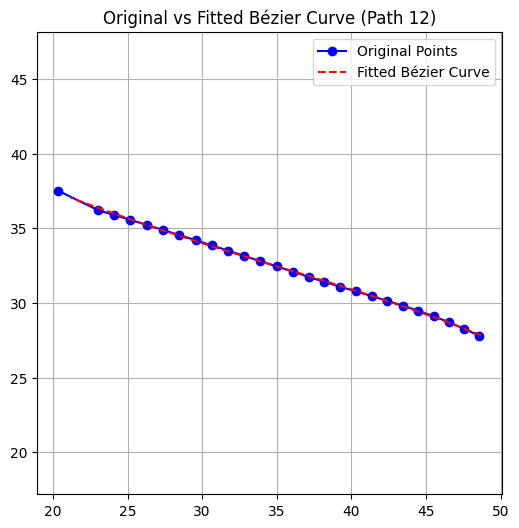

Symmetry along the y-axis for path 13: No


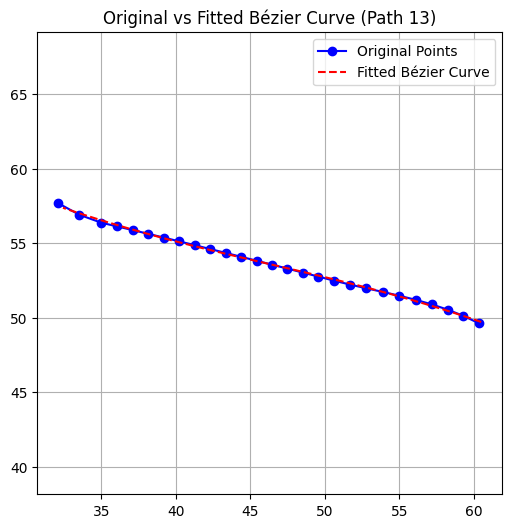

Symmetry along the y-axis for path 14: No


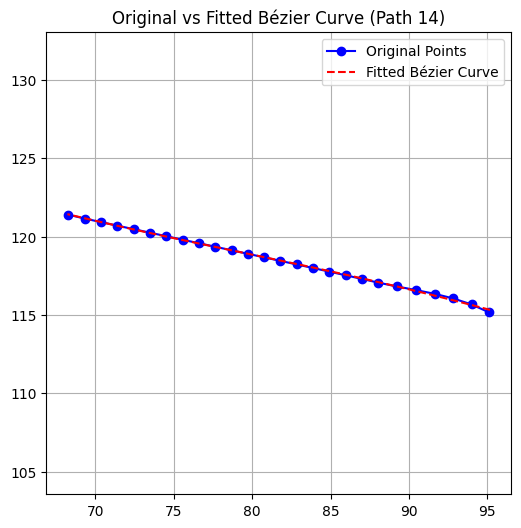

Symmetry along the y-axis for path 15: No


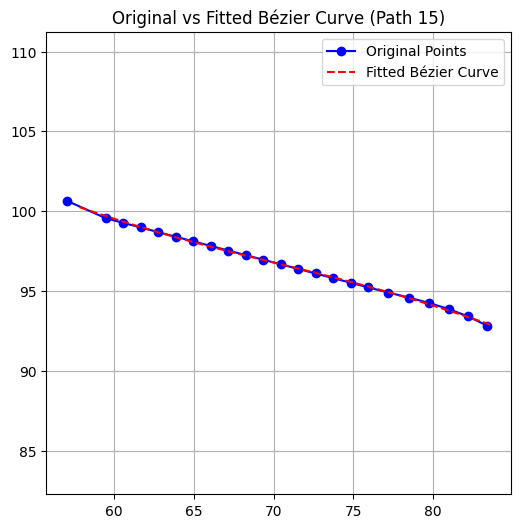

Symmetry along the y-axis for path 16: No


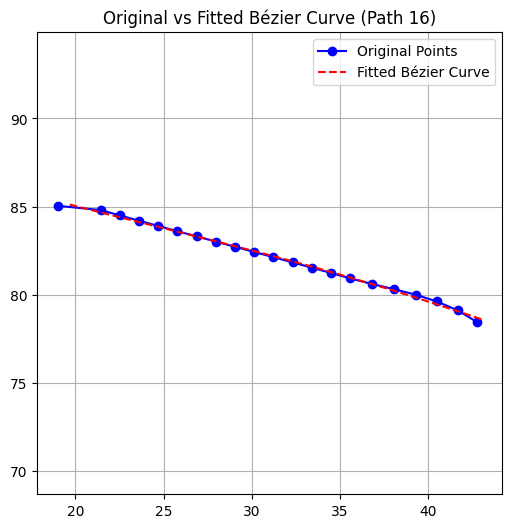

Symmetry along the y-axis for path 17: No


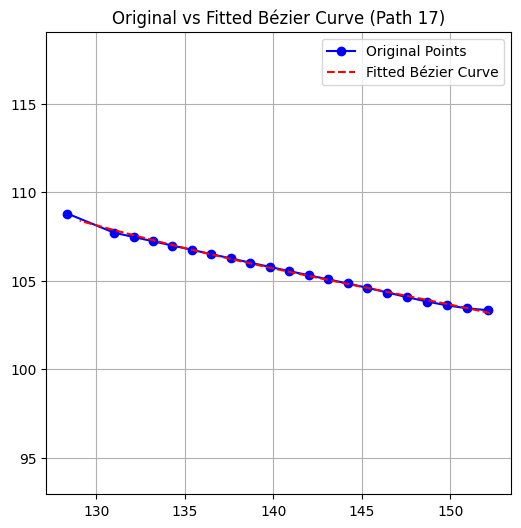

Symmetry along the y-axis for path 18: No


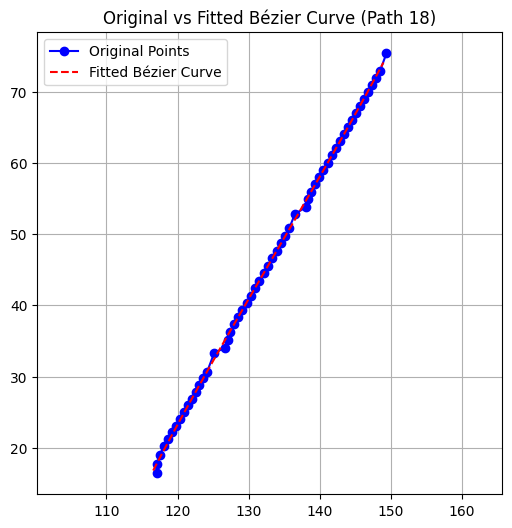

Symmetry along the y-axis for path 19: No


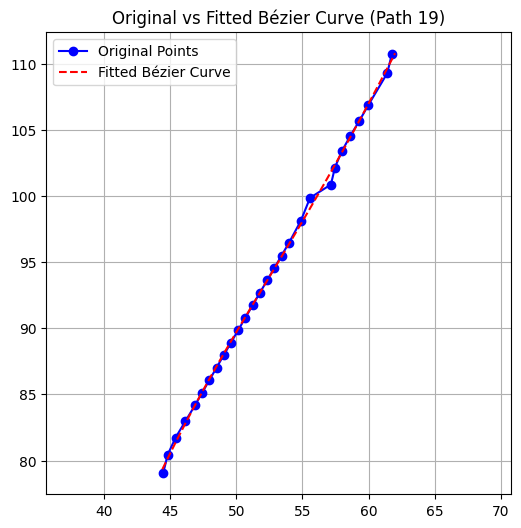

Symmetry along the y-axis for path 20: No


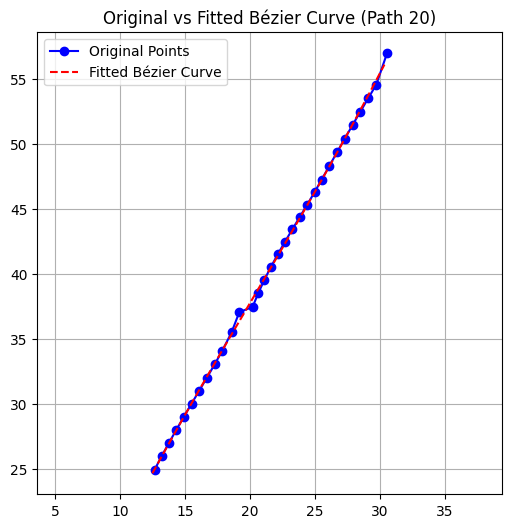

Symmetry along the y-axis for path 21: No


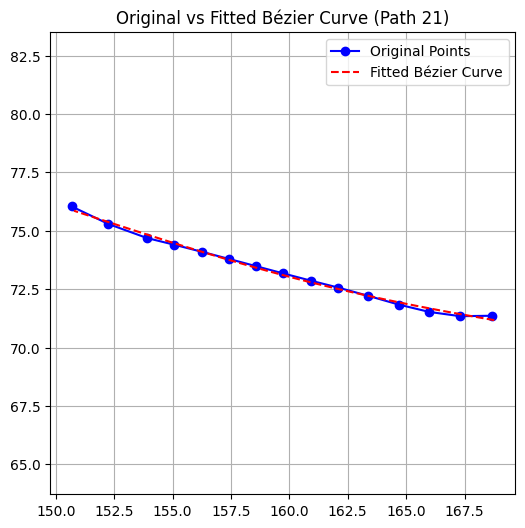

Symmetry along the y-axis for path 22: No


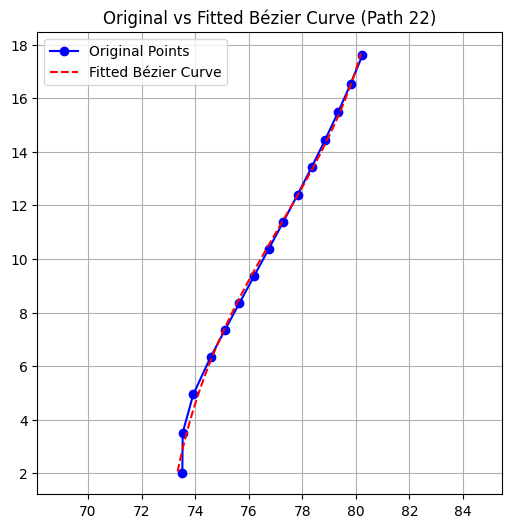

Symmetry along the y-axis for path 23: No


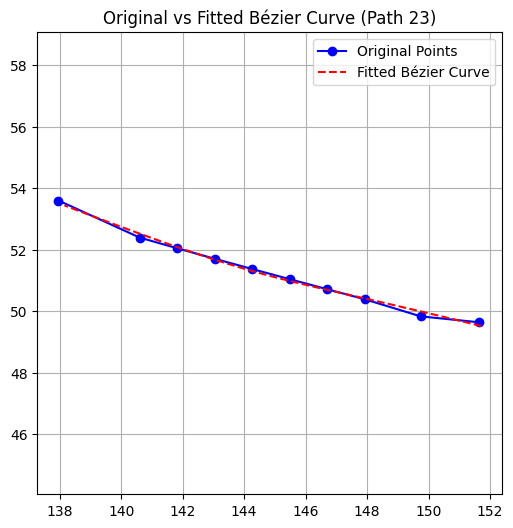

Symmetry along the y-axis for path 24: No


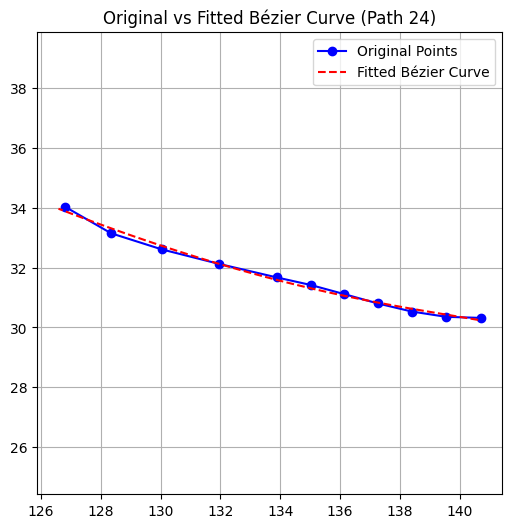

Symmetry along the y-axis for path 25: No


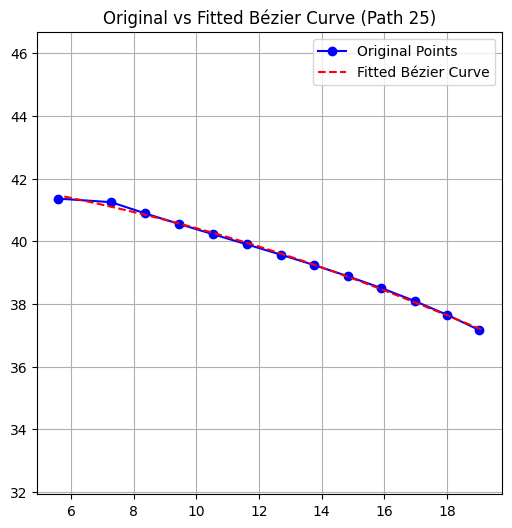

In [74]:
def evaluate_symmetry_and_fit(paths_XYs):
    for i, XYs in enumerate(paths_XYs):
        for XY in XYs:
            # Check for symmetry along y-axis
            is_symmetric_y = check_reflection_symmetry(XY, axis='y')
            print(f"Symmetry along the y-axis for path {i}: {'Yes' if is_symmetric_y else 'No'}")
            
            # Fit a Bézier curve to these points
            bezier_params = fit_bezier(XY)

            # Extract the fitted control points
            P0_fitted = np.array([bezier_params[0], bezier_params[1]])
            P1_fitted = np.array([bezier_params[2], bezier_params[3]])
            P2_fitted = np.array([bezier_params[4], bezier_params[5]])
            P3_fitted = np.array([bezier_params[6], bezier_params[7]])

            # Sample points from the fitted Bézier curve
            fitted_points = sample_bezier(P0_fitted, P1_fitted, P2_fitted, P3_fitted)

            # Plot the original and fitted curves for comparison
            plt.figure(figsize=(6, 6))
            plt.plot(XY[:, 0], XY[:, 1], 'bo-', label='Original Points')
            plt.plot(fitted_points[:, 0], fitted_points[:, 1], 'r--', label='Fitted Bézier Curve')
            plt.title(f'Original vs Fitted Bézier Curve (Path {i})')
            plt.axis('equal')
            plt.grid(True)
            plt.legend()
            plt.show()

# Load input CSV files (example paths, replace with your actual paths)
path0 = 'resources/frag0.csv'
path1 = 'resources/frag1.csv'
path2 = 'resources/frag2.csv'

# Process and plot
paths_XYs0 = read_csv(path0)
paths_XYs1 = read_csv(path1)
paths_XYs2 = read_csv(path2)

# Plot the shapes
plot(paths_XYs0, title='frag0.csv')
plot(paths_XYs1, title='frag1.csv')
plot(paths_XYs2, title='frag2.csv')

# Evaluate symmetry and fit Bézier curves for the loaded paths
evaluate_symmetry_and_fit(paths_XYs0)
evaluate_symmetry_and_fit(paths_XYs1)
evaluate_symmetry_and_fit(paths_XYs2)